Load Glutamatergic Data

In [1]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
import scanpy.external as sce
import nsforest as ns
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "G:/Shared drives/Opossum transcriptomics/Data/Opossum_M1/"

adata = sc.read_h5ad(data_path + "Opossum_M1_GABA.h5ad")
adata

AnnData object with n_obs × n_vars = 13278 × 18827
    obs: 'batch', 'species', 'n_genes', 'n_counts', 'leiden', 'doublet', 'doublet_score', 'class'
    var: 'gene_ids', 'feature_types', 'genome'

In [2]:
adata.X = adata.raw.X

Analyze Glutamatergic Cells

In [3]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


2023-05-16 08:21:11,966 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-05-16 08:21:16,260 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-05-16 08:21:16,398 - harmonypy - INFO - Iteration 1 of 10
2023-05-16 08:21:22,165 - harmonypy - INFO - Iteration 2 of 10
2023-05-16 08:21:28,042 - harmonypy - INFO - Iteration 3 of 10
2023-05-16 08:21:32,955 - harmonypy - INFO - Iteration 4 of 10
2023-05-16 08:21:35,661 - harmonypy - INFO - Iteration 5 of 10
2023-05-16 08:21:37,920 - harmonypy - INFO - Iteration 6 of 10
2023-05-16 08:21:40,170 - harmonypy - INFO - Iteration 7 of 10
2023-05-16 08:21:42,444 - harmonypy - INFO - Converged after 7 iterations


computing neighbors


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:32)
running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


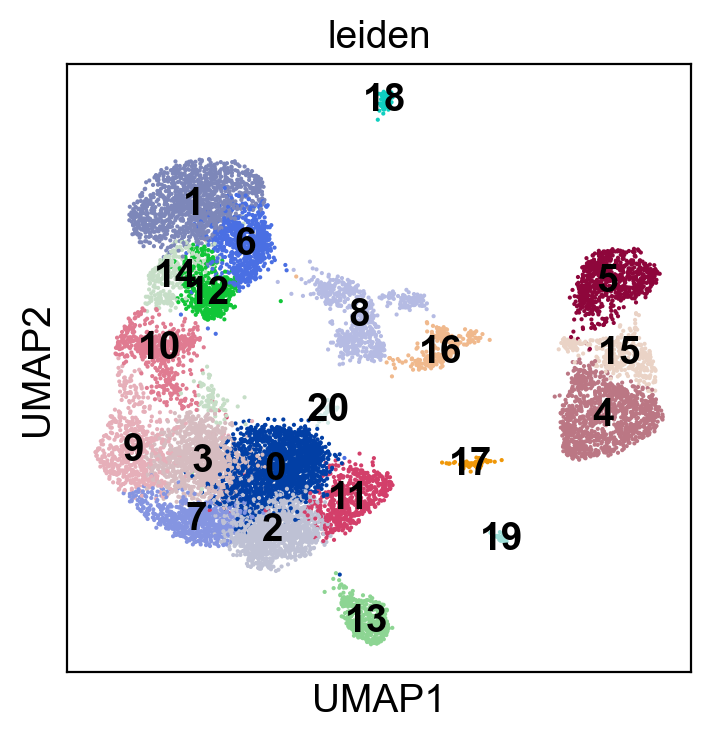

In [4]:
sc.tl.pca(adata, svd_solver="arpack")
sce.pp.harmony_integrate(adata, "batch", max_iter_harmony=20, random_state=66)
sc.pp.neighbors(adata, n_neighbors=25, use_rep="X_pca_harmony")
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


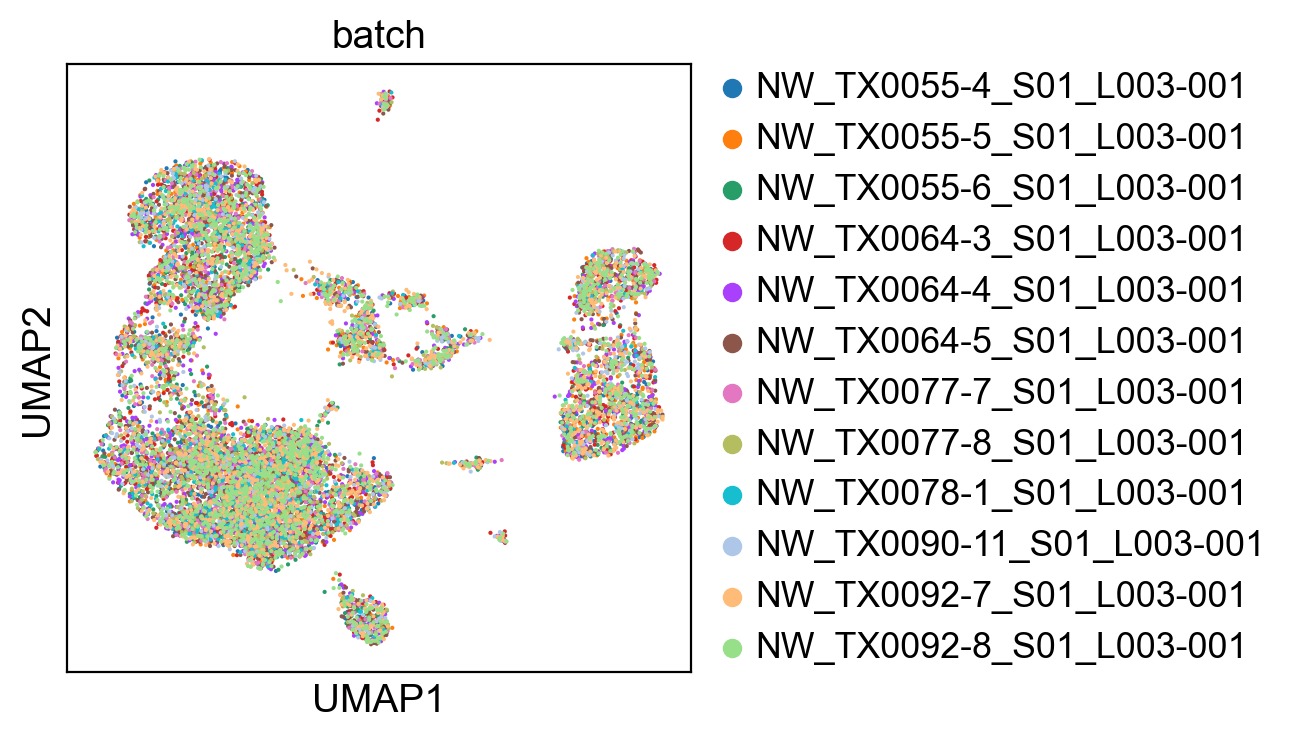

In [5]:
sc.pl.umap(adata, color=["batch"])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


C:\Ryan\GitHub\scanpy\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


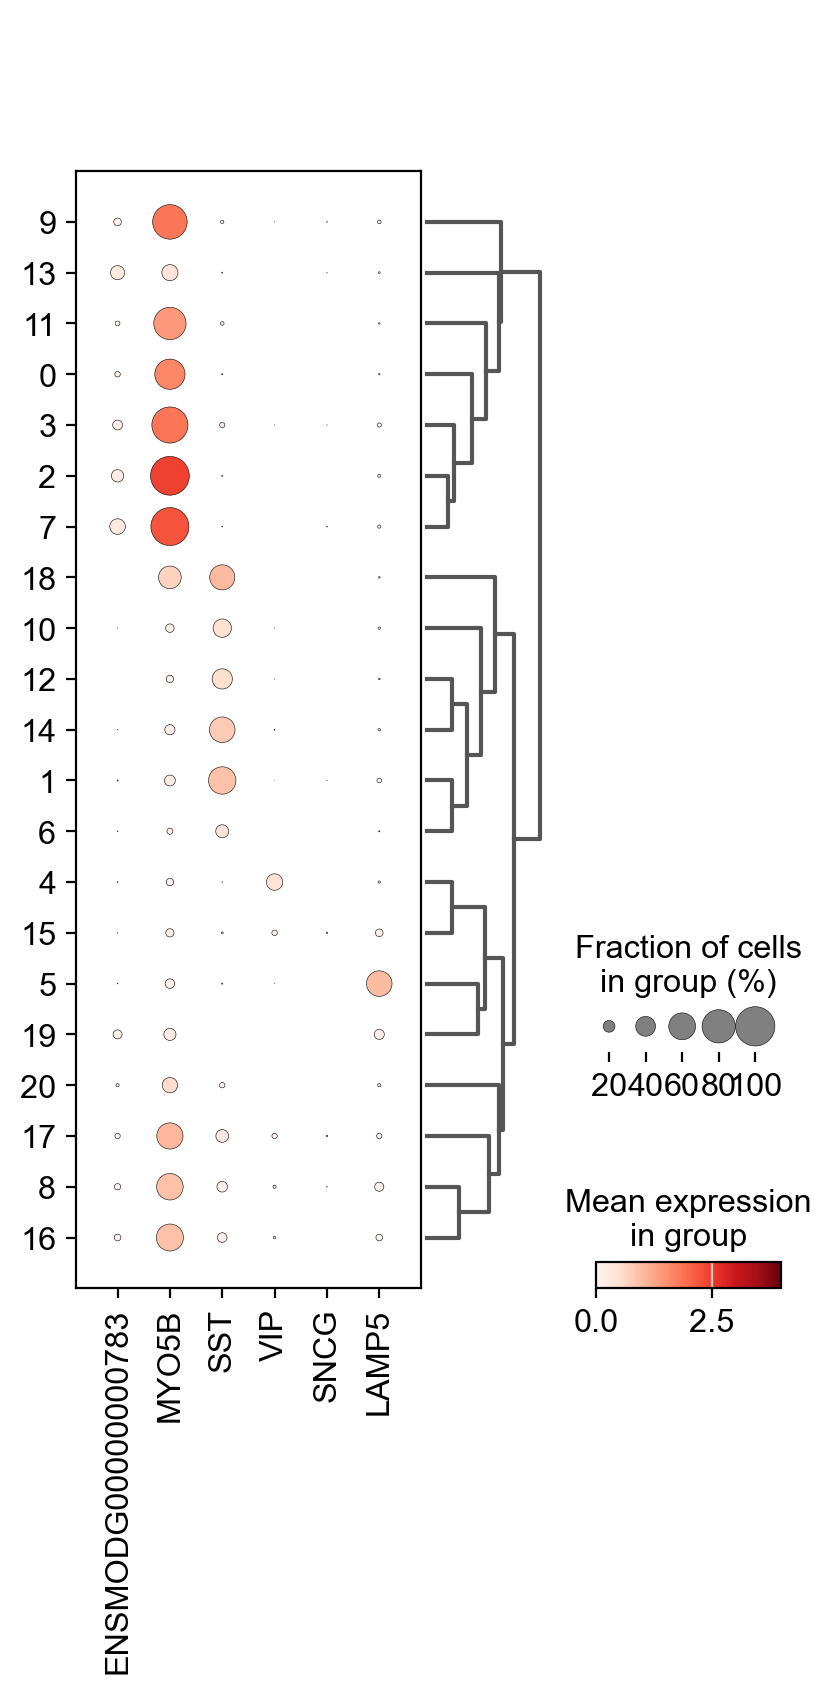

In [6]:
glutamatergic_markers = [
                         "ENSMODG00000000783", "MYO5B", 
                         "SST", 
                         "VIP", #  "PAX6", "TMEM182", "PLCH2", "DOCK5",  
                         "SNCG", 
                         "LAMP5", 
                        ]

sc.pl.dotplot(
    adata, 
    glutamatergic_markers, 
    groupby="leiden", 
    dendrogram=True, 
    vmin=0, vmax=4, 
    # var_group_positions=[(0, 1), (2, 4), (5, 6), (7, 9), (10, 23), (24, 28)], 
    # var_group_labels=["General", "2/3", "2/3 & 4", "4", "5", "6"], 
    var_group_rotation=0, 
            )

Save Clustered AnnData Object

In [7]:
adata.write_h5ad(data_path + "Opossum_M1_GABA_Clustered.h5ad")